In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering

## Cargando archivos

In [2]:
X = pd.read_csv('datos/entrenamiento_x_reducido.csv')
y = pd.read_csv('datos/entrenamiento_clases.csv')

In [3]:
print("Tamaño de x: ", X.shape)
print("Tamaño de y: ", y.shape)

Tamaño de x:  (1792, 1000)
Tamaño de y:  (1792, 1)


## Definiendo clases en Benignas y malignas

In [4]:
# 0: Benigno, 1: Maligno
# ['actinic keratosis', 0
#  'basal cell carcinoma', 1
#  'dermatofibroma', 0
#  'melanoma', 1
#  'nevus', 0
#  'pigmented benign keratosis', 0
#  'seborrheic keratosis', 0
#  'squamous cell carcinoma', 1
#  'vascular lesion', 0]

representacion = {
    0:0
    , 1:1
    , 2:0
    , 3:1
    , 4:0
    , 5:0
    , 6:0
    , 7:1
    , 8:0
}

y_clas = y['0'].map(representacion)
y_clas = pd.DataFrame(y_clas)
y_clas.columns = ['Clase']

In [5]:
clus, cant = np.unique(y_clas, return_counts=True)
print('Cantidades ', cant)
print('*'*100)

Cantidades  [973 819]
****************************************************************************************************


In [32]:
y_clas

,Clase
0,1
1,1
2,0
3,1
4,1
...,...
1787,1
1788,0
1789,0
1790,0


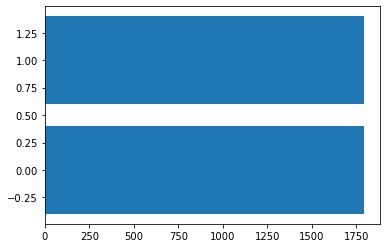

In [34]:
plt.barh(y_clas.Clase,y_clas.Clase.count())
plt.show()


In [6]:
X.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_990,PCA_991,PCA_992,PCA_993,PCA_994,PCA_995,PCA_996,PCA_997,PCA_998,PCA_999
0,10.908598,1.731220,-11.957571,-3.084814,-5.220286,-0.245602,0.741213,-7.327015,2.408583,1.815283,...,-0.125636,0.194950,0.052009,-0.274253,0.063322,0.191382,0.287368,-0.234474,-0.063536,0.367030
1,-27.000866,-6.137454,-4.347590,-4.735361,-2.471949,-0.811759,4.093056,-5.114448,2.181211,0.304302,...,-0.032288,-0.293105,0.001584,-0.189338,0.058535,0.025847,0.038109,0.405362,-0.149179,-0.176947
2,-17.898352,14.117321,0.696032,3.661380,-4.962165,1.412298,1.768913,-3.381546,0.688466,1.503532,...,0.012488,0.015817,0.029272,0.024723,0.069778,-0.035320,0.085828,-0.097289,0.111317,-0.067919
3,8.581274,1.382289,-2.616583,10.061180,-5.671208,0.906693,4.610065,0.334371,-5.988895,10.972426,...,0.114155,0.007109,0.077066,0.190308,0.174067,-0.199319,-0.138939,-0.205776,-0.009308,0.005199
4,-8.042802,1.405010,-15.300263,-3.349104,-2.754727,3.764467,-1.838214,-4.482556,1.576751,2.076484,...,-0.229033,-0.118298,-0.079819,-0.075868,-0.070663,-0.026626,0.104950,0.146822,-0.072624,-0.327119


In [7]:
y_clas.head()

,Clase
0,1
1,1
2,0
3,1
4,1


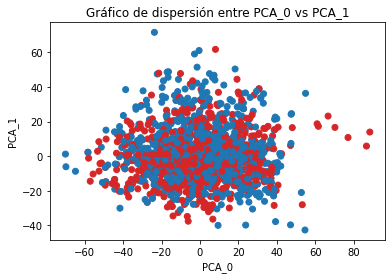

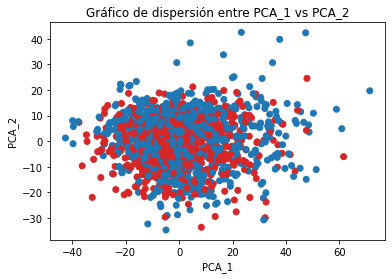

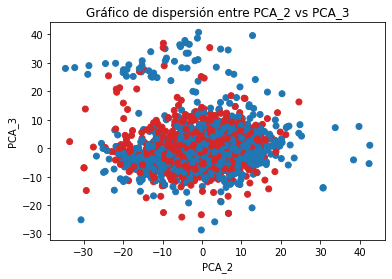

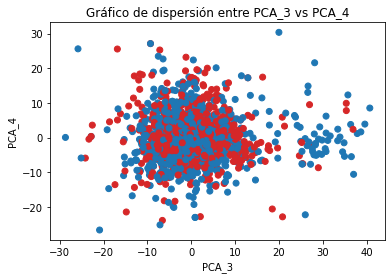

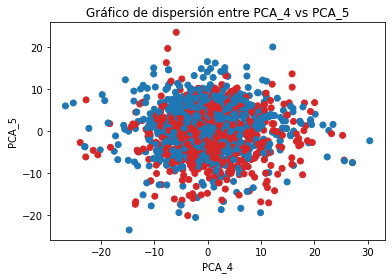

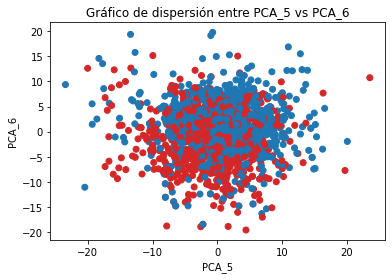

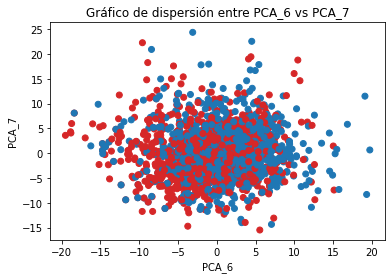

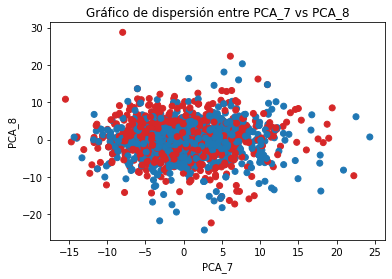

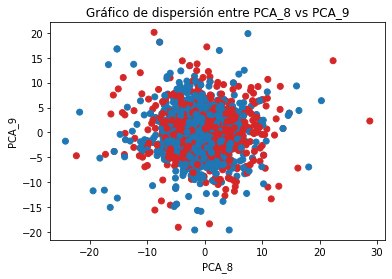

In [8]:
colors = {0:'tab:blue', 1:'tab:red'}
for i in range(9):
    plt.scatter(x=X[('PCA_'+ str(i))], y=X[('PCA_'+ str(i+1))],c= y_clas['Clase'].map(colors) , cmap='tab20b')
    plt.xlabel(('PCA_'+ str(i)))
    plt.ylabel(('PCA_'+ str(i+1)))
    plt.title('Gráfico de dispersión entre PCA_{} vs PCA_{}'.format(str(i), str(i+1)))
    plt.show()

## K-Means

### 240 PCA (95% varianza explicada)

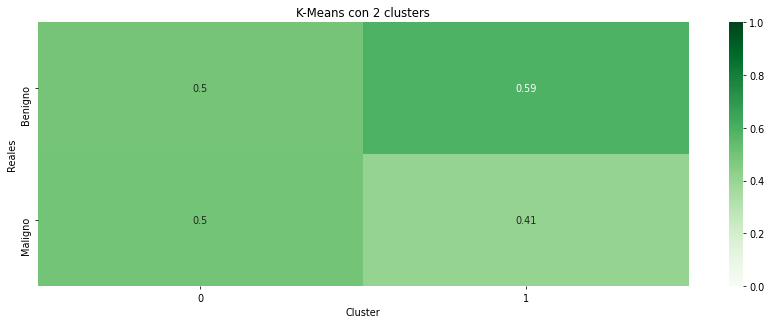

Cantidades  [909 883]
****************************************************************************************************


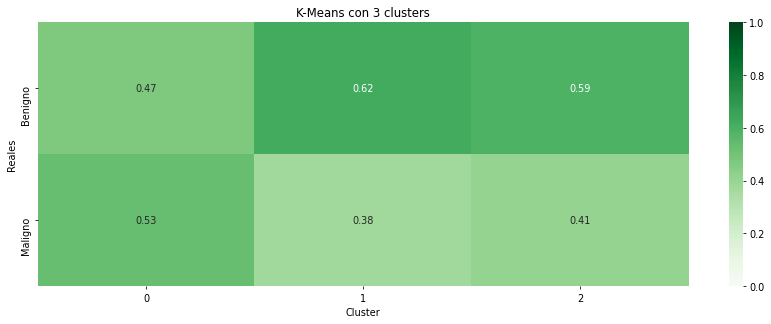

Cantidades  [786 306 700]
****************************************************************************************************


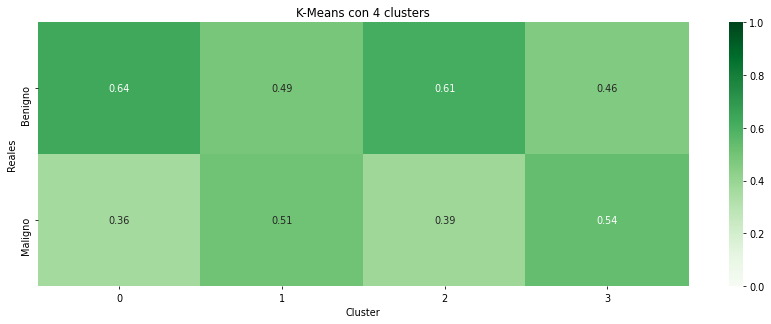

Cantidades  [291 644 503 354]
****************************************************************************************************


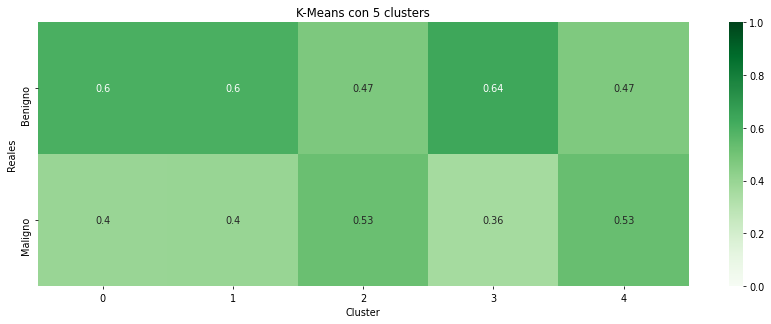

Cantidades  [423 256 544 225 344]
****************************************************************************************************


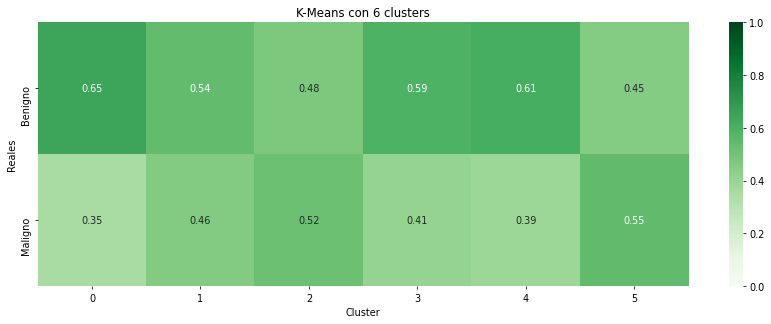

Cantidades  [201 126 509 272 387 297]
****************************************************************************************************


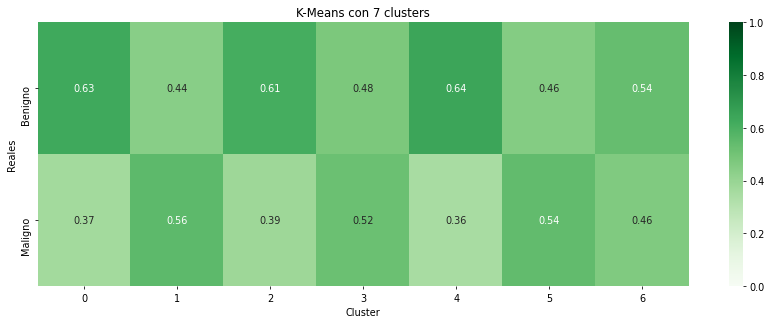

Cantidades  [343 187 285 434 183 246 114]
****************************************************************************************************


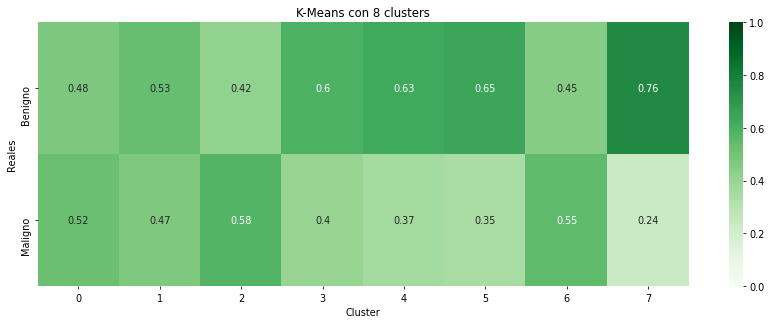

Cantidades  [414 113 167 302 328 170 249  49]
****************************************************************************************************


In [9]:
for i in range(2,9):
    kmeans = KMeans(n_clusters = i, n_init = 100, random_state = 1234).fit_predict(X[X.columns[:240]])
    cf_matrix = confusion_matrix(y_clas, kmeans)
    cf_matrix = cf_matrix[0:2]

    fig = plt.figure(figsize = (15, 5), dpi = 70)
    s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
                   cmap="Greens", yticklabels=['Benigno', 'Maligno'])
    s.set(xlabel='Cluster', ylabel='Reales')
    plt.title('K-Means con {} clusters'.format(str(i)))
    plt.show()
    
    clus, cant = np.unique(kmeans, return_counts=True)
    print('Cantidades ', cant)
    print('*'*100)

### 1000 PCA (99% varianza explicada)

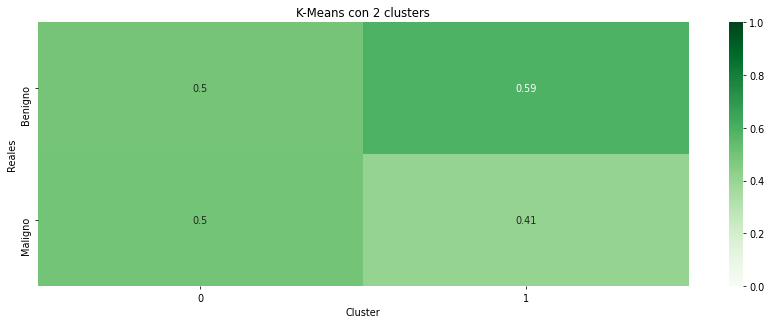

Cantidades  [909 883]
****************************************************************************************************


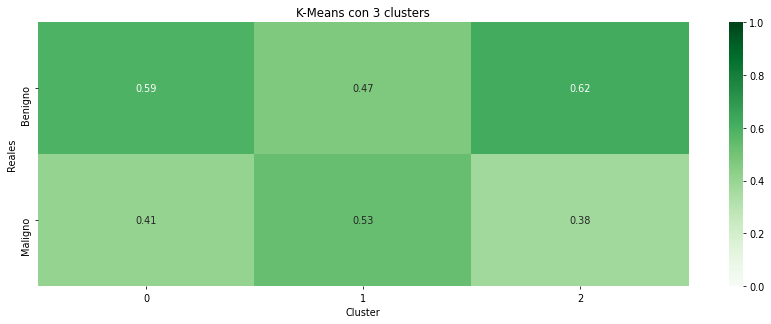

Cantidades  [700 788 304]
****************************************************************************************************


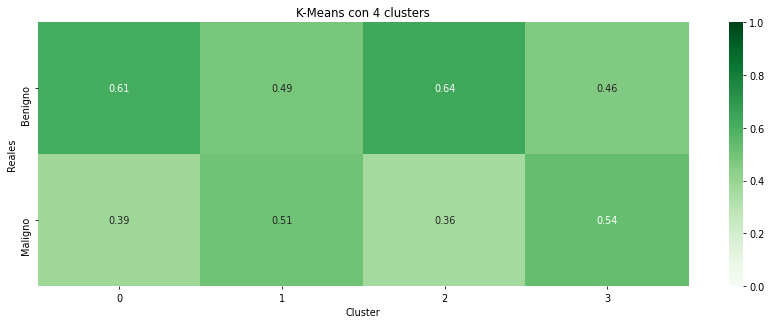

Cantidades  [503 644 291 354]
****************************************************************************************************


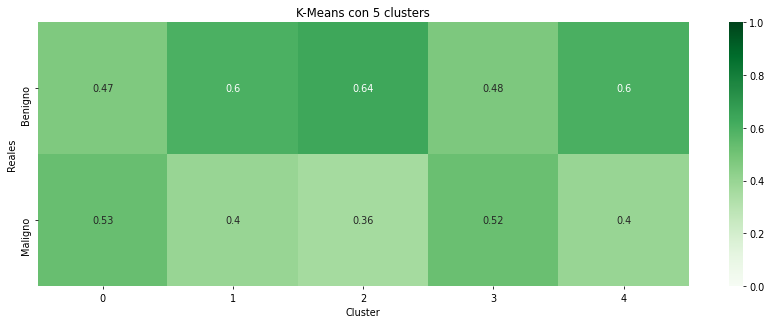

Cantidades  [344 424 225 543 256]
****************************************************************************************************


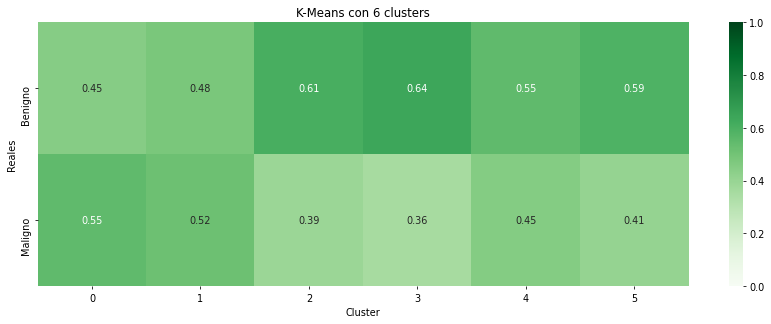

Cantidades  [294 514 383 202 128 271]
****************************************************************************************************


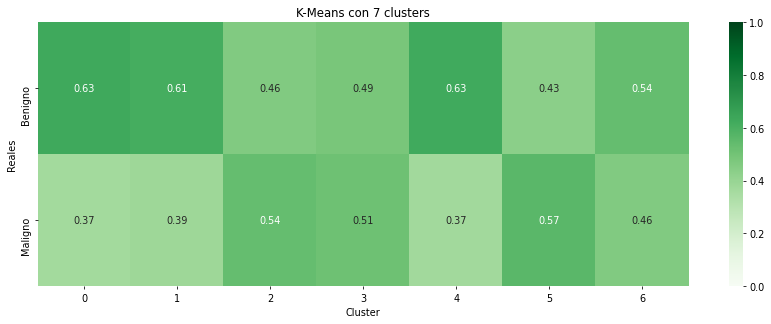

Cantidades  [337 314 272 379 169 198 123]
****************************************************************************************************


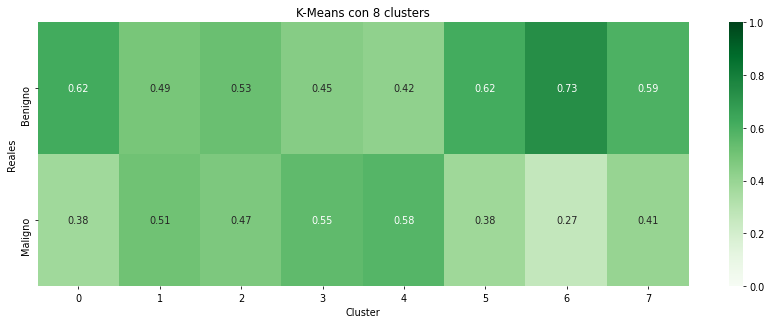

Cantidades  [334 374 110 244 180 168  49 333]
****************************************************************************************************


In [10]:
for i in range(2,9):
    kmeans = KMeans(n_clusters = i, n_init = 100, random_state = 1234).fit_predict(X)
    cf_matrix = confusion_matrix(y_clas, kmeans)
    cf_matrix = cf_matrix[0:2]

    fig = plt.figure(figsize = (15, 5), dpi = 70)
    s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
                   cmap="Greens", yticklabels=['Benigno', 'Maligno'])
    s.set(xlabel='Cluster', ylabel='Reales')
    plt.title('K-Means con {} clusters'.format(str(i)))
    plt.show()
    
    clus, cant = np.unique(kmeans, return_counts=True)
    print('Cantidades ', cant)
    print('*'*100)

## Cluster jerarquico

### 240 PCA (95% varianza explicada)

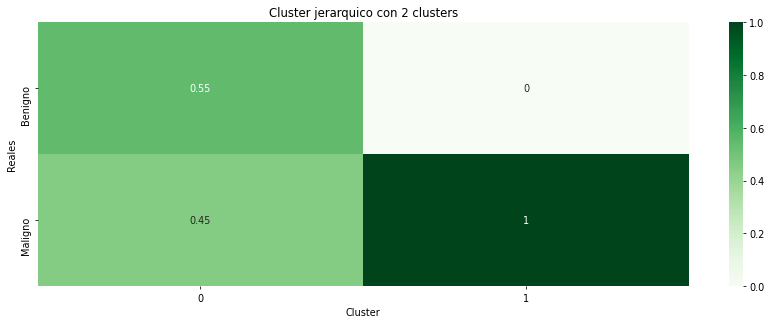

Cantidades  [1784    8]
****************************************************************************************************


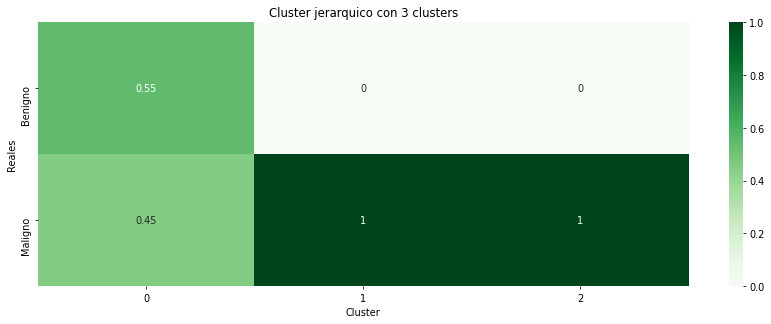

Cantidades  [1782    8    2]
****************************************************************************************************


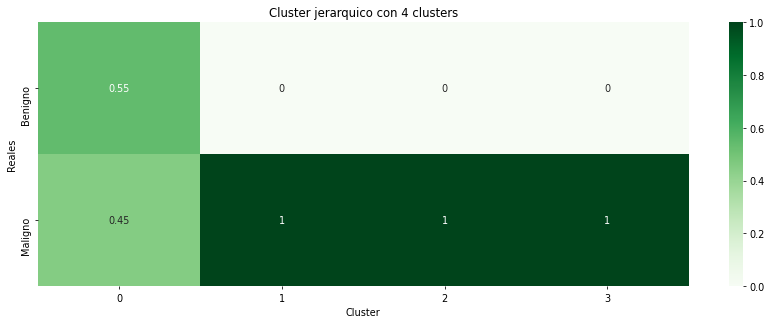

Cantidades  [1781    8    2    1]
****************************************************************************************************


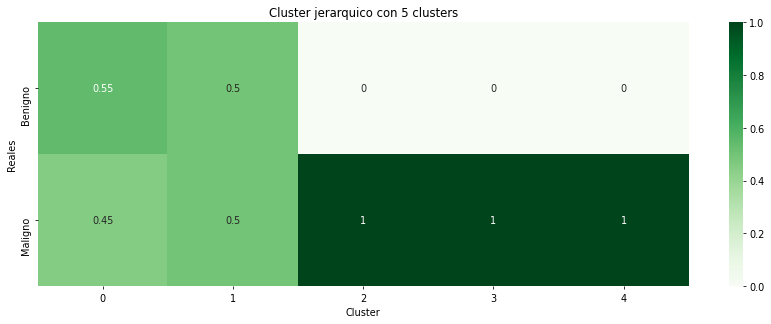

Cantidades  [1775    6    2    1    8]
****************************************************************************************************


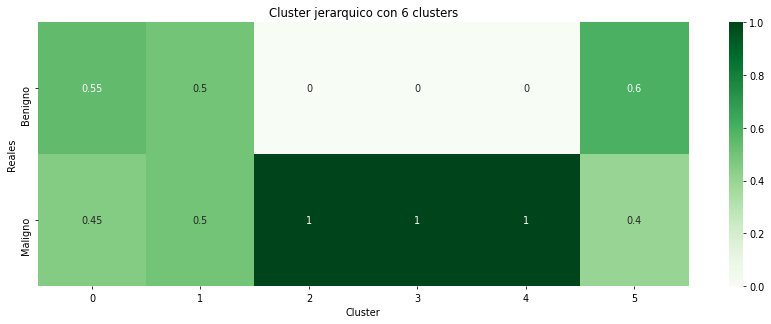

Cantidades  [1770    6    2    1    8    5]
****************************************************************************************************


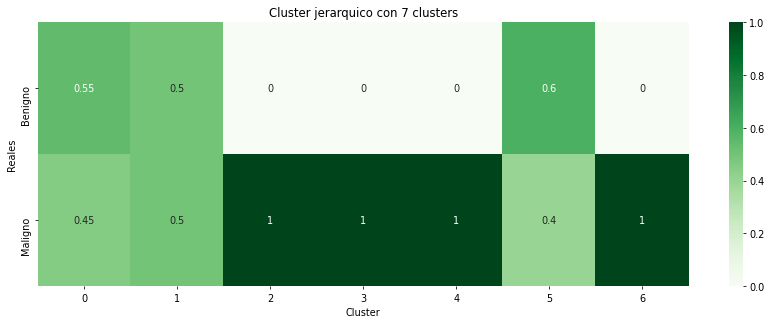

Cantidades  [1769    6    2    1    8    5    1]
****************************************************************************************************


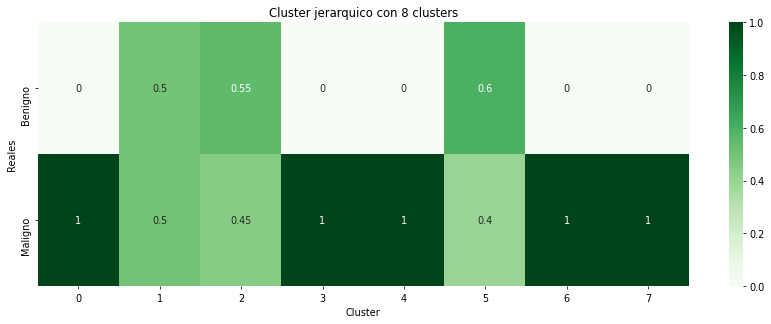

Cantidades  [   2    6 1768    1    8    5    1    1]
****************************************************************************************************


In [11]:
for i in range(2,9):
    cluster_sk = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')
    cluster_sk = cluster_sk.fit_predict(X[X.columns[:240]])
    
    cf_matrix = confusion_matrix(y_clas, cluster_sk)
    cf_matrix = cf_matrix[0:2]

    fig = plt.figure(figsize = (15, 5), dpi = 70)
    s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
                   cmap="Greens", yticklabels=['Benigno', 'Maligno'])
    s.set(xlabel='Cluster', ylabel='Reales')
    plt.title('Cluster jerarquico con {} clusters'.format(str(i)))
    plt.show()
    
    clus, cant = np.unique(cluster_sk, return_counts=True)
    print('Cantidades ', cant)
    print('*'*100)

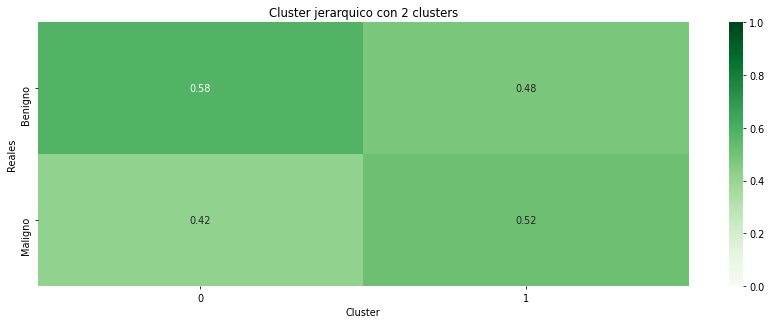

Cantidades  [1060  732]
****************************************************************************************************


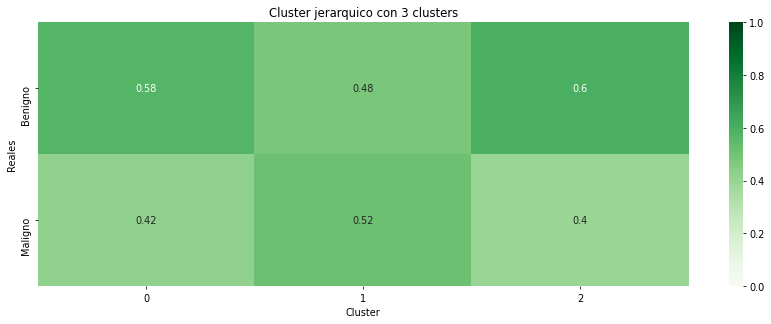

Cantidades  [812 732 248]
****************************************************************************************************


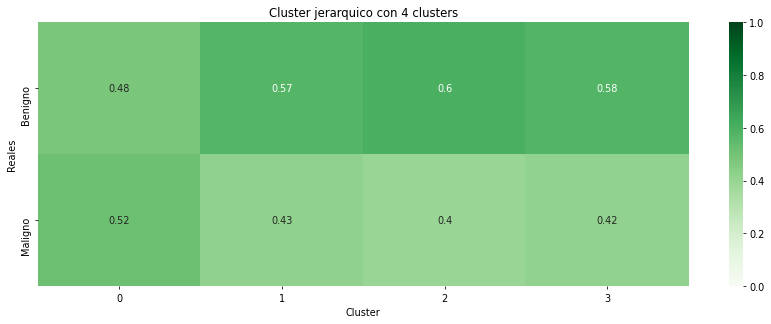

Cantidades  [732 487 248 325]
****************************************************************************************************


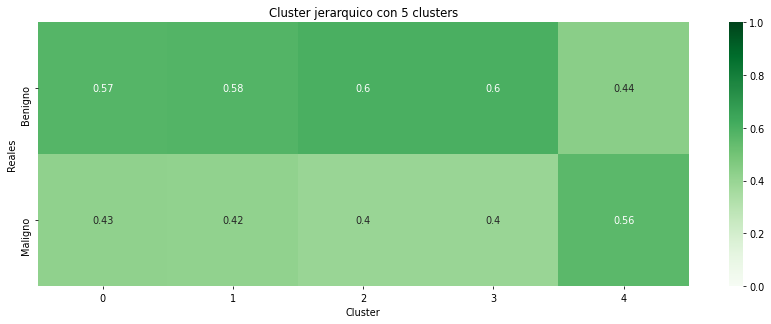

Cantidades  [487 325 248 194 538]
****************************************************************************************************


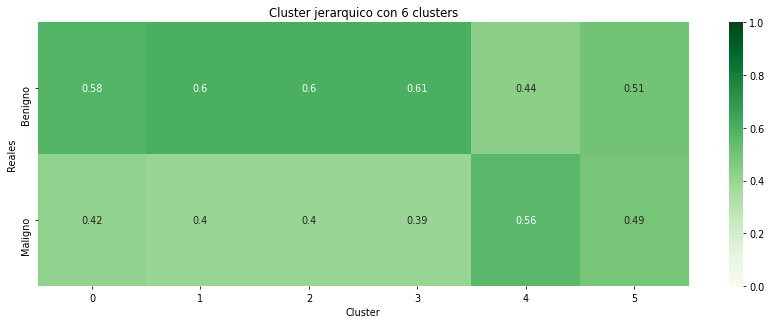

Cantidades  [325 194 248 337 538 150]
****************************************************************************************************


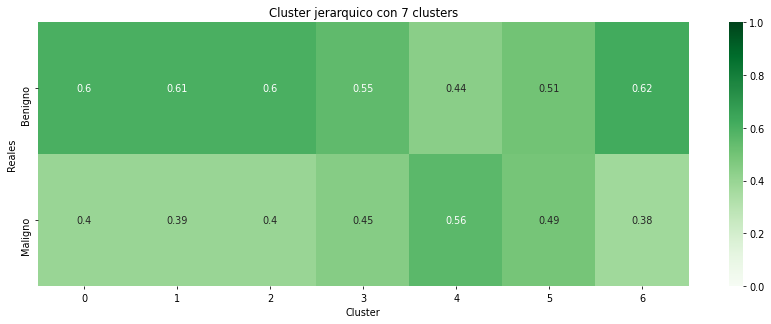

Cantidades  [194 337 248 182 538 150 143]
****************************************************************************************************


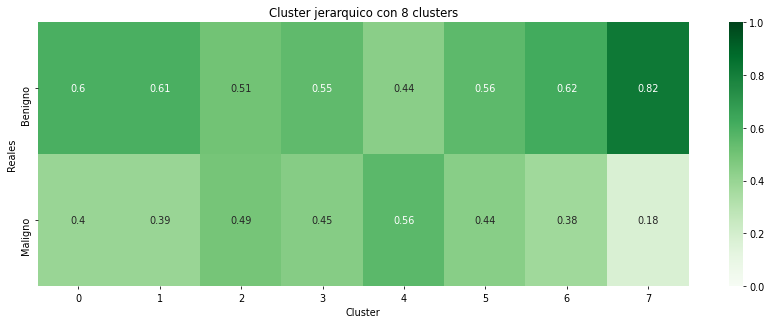

Cantidades  [248 337 150 182 538 160 143  34]
****************************************************************************************************


In [12]:
# Optimizando los parámetros para que se ajusten a lo que deseamos

# Ward sólo funciona con distancia euclidiana, pero su resultado para este ejercicio da muy similar que al usar 
# distancia coseno con un linkage de tipo completo.

# La distancia single genera un resultado similar al de arriba, en el cuál agrupa casi todas las imagenes en un cluster y 
# llena los restantes clusters con una sóla imagen.
for i in range(2,9):
    cluster_sk = AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='complete')
    cluster_sk = cluster_sk.fit_predict(X[X.columns[:240]])
    
    cf_matrix = confusion_matrix(y_clas, cluster_sk)
    cf_matrix = cf_matrix[0:2]

    fig = plt.figure(figsize = (15, 5), dpi = 70)
    s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
                   cmap="Greens", yticklabels=['Benigno', 'Maligno'])
    s.set(xlabel='Cluster', ylabel='Reales')
    plt.title('Cluster jerarquico con {} clusters'.format(str(i)))
    plt.show()
    
    clus, cant = np.unique(cluster_sk, return_counts=True)
    print('Cantidades ', cant)
    print('*'*100)

### 1000 PCA (99% varianza explicada)

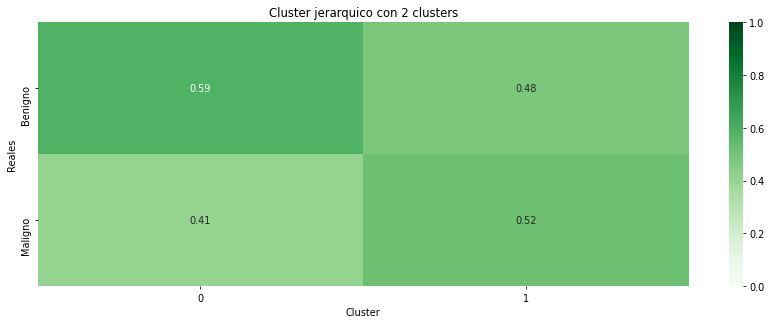

Cantidades  [1041  751]
****************************************************************************************************


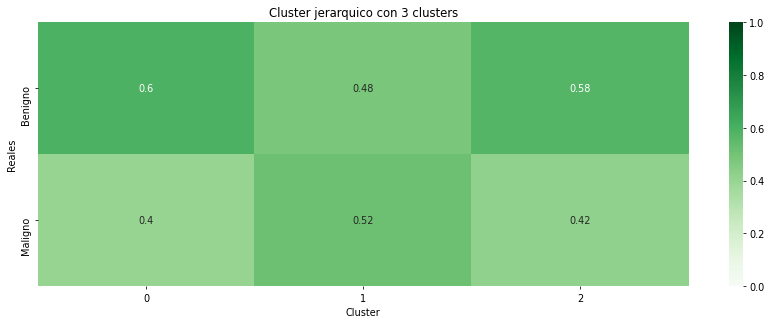

Cantidades  [609 751 432]
****************************************************************************************************


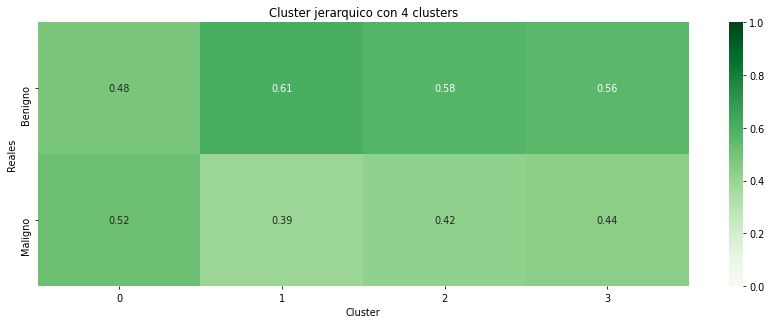

Cantidades  [751 440 432 169]
****************************************************************************************************


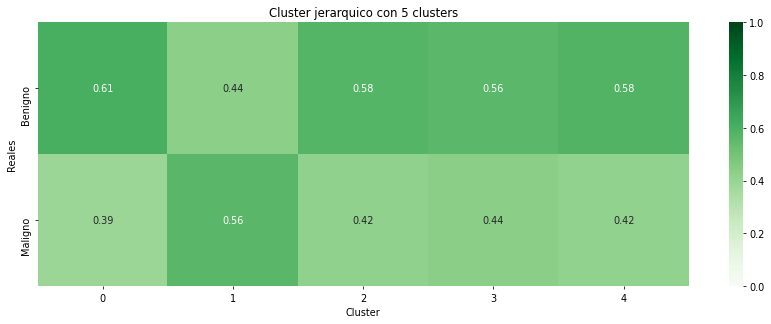

Cantidades  [440 525 432 169 226]
****************************************************************************************************


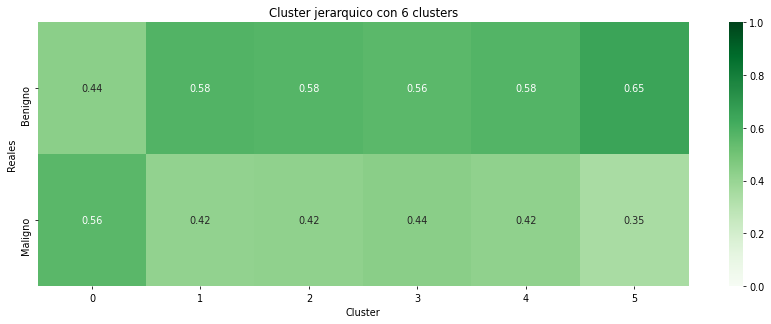

Cantidades  [525 226 432 169 256 184]
****************************************************************************************************


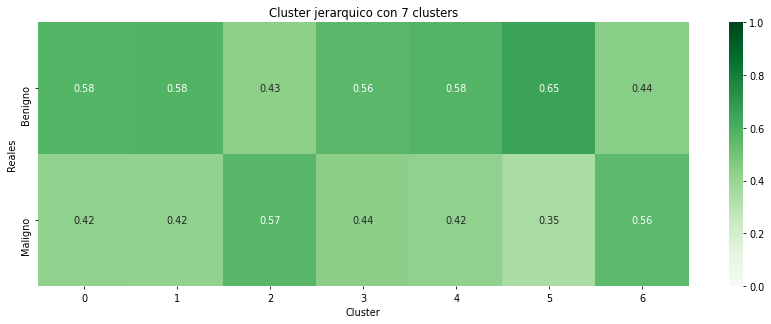

Cantidades  [432 226 242 169 256 184 283]
****************************************************************************************************


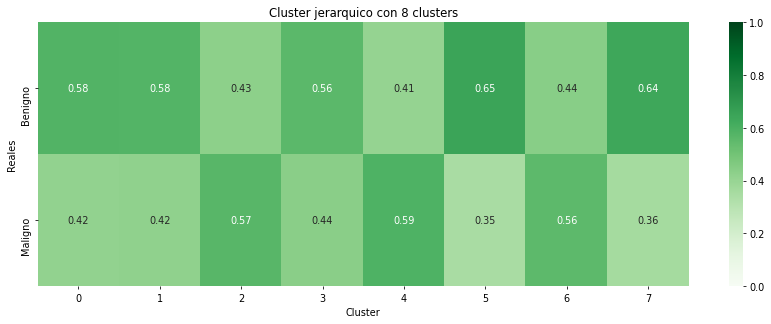

Cantidades  [226 256 242 169 118 184 283 314]
****************************************************************************************************


In [13]:
for i in range(2,9):
    cluster_sk = AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='complete')
    cluster_sk = cluster_sk.fit_predict(X)
    
    cf_matrix = confusion_matrix(y_clas, cluster_sk)
    cf_matrix = cf_matrix[0:2]

    fig = plt.figure(figsize = (15, 5), dpi = 70)
    s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
                   cmap="Greens", yticklabels=['Benigno', 'Maligno'])
    s.set(xlabel='Cluster', ylabel='Reales')
    plt.title('Cluster jerarquico con {} clusters'.format(str(i)))
    plt.show()
    
    clus, cant = np.unique(cluster_sk, return_counts=True)
    print('Cantidades ', cant)
    print('*'*100)

### Prueba

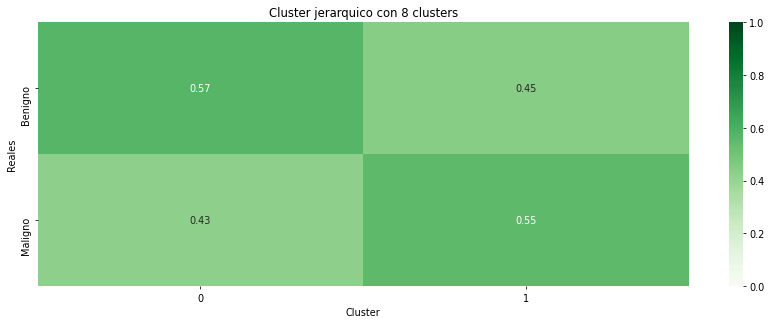

Cantidades  [1364  428]
****************************************************************************************************


In [14]:
cluster_sk = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_sk = cluster_sk.fit_predict(X[['PCA_5', 'PCA_6']])

cf_matrix = confusion_matrix(y_clas, cluster_sk)
cf_matrix = cf_matrix[0:2]

fig = plt.figure(figsize = (15, 5), dpi = 70)
s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
               cmap="Greens", yticklabels=['Benigno', 'Maligno'])
s.set(xlabel='Cluster', ylabel='Reales')
plt.title('Cluster jerarquico con {} clusters'.format(str(i)))
plt.show()

clus, cant = np.unique(cluster_sk, return_counts=True)
print('Cantidades ', cant)
print('*'*100)

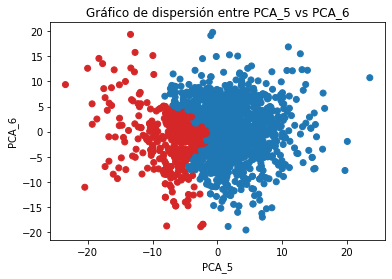

In [15]:
plt.scatter(x=X['PCA_5'], y=X['PCA_6'],c= pd.Series(cluster_sk).map(colors) , cmap='tab20b')
plt.xlabel(('PCA_'+ str(5)))
plt.ylabel(('PCA_'+ str(5+1)))
plt.title('Gráfico de dispersión entre PCA_{} vs PCA_{}'.format(str(5), str(5+1)))
plt.show()

In [16]:
data = pd.concat([X,y_clas], axis = 1)

In [17]:
data

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_991,PCA_992,PCA_993,PCA_994,PCA_995,PCA_996,PCA_997,PCA_998,PCA_999,Clase
0,10.908598,1.731220,-11.957571,-3.084814,-5.220286,-0.245602,0.741213,-7.327015,2.408583,1.815283,...,0.194950,0.052009,-0.274253,0.063322,0.191382,0.287368,-0.234474,-0.063536,0.367030,1
1,-27.000866,-6.137454,-4.347590,-4.735361,-2.471949,-0.811759,4.093056,-5.114448,2.181211,0.304302,...,-0.293105,0.001584,-0.189338,0.058535,0.025847,0.038109,0.405362,-0.149179,-0.176947,1
2,-17.898352,14.117321,0.696032,3.661380,-4.962165,1.412298,1.768913,-3.381546,0.688466,1.503532,...,0.015817,0.029272,0.024723,0.069778,-0.035320,0.085828,-0.097289,0.111317,-0.067919,0
3,8.581274,1.382289,-2.616583,10.061180,-5.671208,0.906693,4.610065,0.334371,-5.988895,10.972426,...,0.007109,0.077066,0.190308,0.174067,-0.199319,-0.138939,-0.205776,-0.009308,0.005199,1
4,-8.042802,1.405010,-15.300263,-3.349104,-2.754727,3.764467,-1.838214,-4.482556,1.576751,2.076484,...,-0.118298,-0.079819,-0.075868,-0.070663,-0.026626,0.104950,0.146822,-0.072624,-0.327119,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.277418,6.382448,-3.003891,-5.655121,-3.650217,1.907044,4.948167,1.873343,-2.809307,-2.759213,...,-0.207181,-0.147706,-0.045290,0.124979,0.039215,-0.098159,-0.209225,0.034267,0.206762,1
1788,11.889967,14.242496,-24.104303,-0.803876,5.268834,7.882213,7.033261,0.286632,-1.062252,-2.453976,...,0.181697,-0.090629,0.122747,0.271316,0.031495,-0.237972,-0.243526,-0.273022,-0.492229,0
1789,-11.385296,-8.641455,-2.461734,-5.064115,2.759260,2.922419,1.473087,5.396779,-0.765602,-1.372002,...,0.140698,0.185680,0.113891,-0.494328,-0.103451,-0.257632,0.110337,-0.362654,-0.209557,0
1790,19.469460,-22.717075,2.852786,4.118888,-3.751194,2.143194,4.169493,5.684391,-1.463762,3.639894,...,-0.249368,0.349803,-0.165343,-0.468105,-0.283211,0.129599,0.135281,-0.212628,0.658965,0


## DBSCAN

### 240 PCA (95% varianza explicada)

37.29396094887518


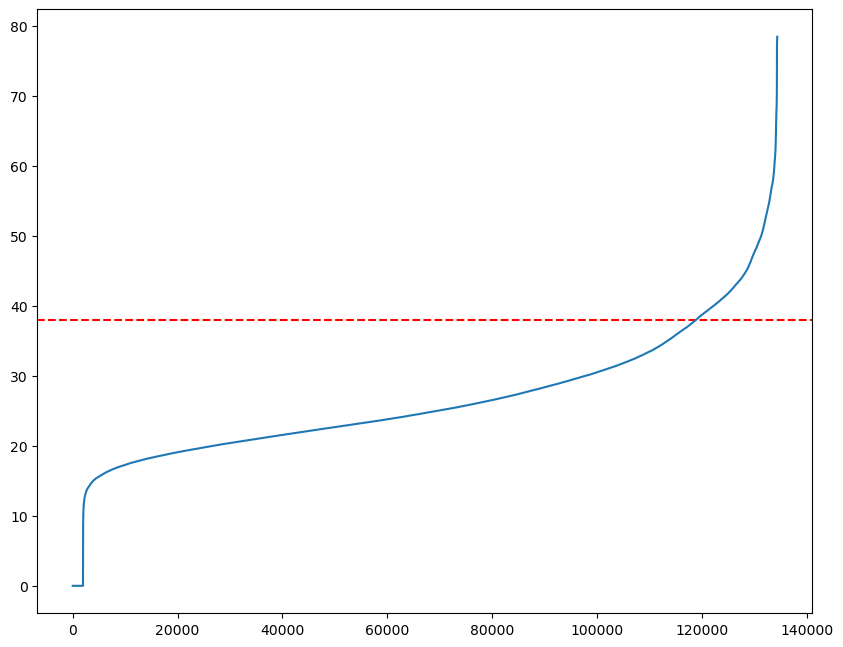

In [18]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

neigh = NearestNeighbors(n_neighbors = 75)
nbrs = neigh.fit(X[X.columns[:240]])
distancias, indices = nbrs.kneighbors(X[X.columns[:240]])
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 38, color = 'r', linestyle = '--')
plt.plot(distancias)

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
e = distancias[knee.knee]
print(e)

Usando euclidean, Se encontraron 5 clusteres + 1 de ruido, para el samples 2.00
[-1  0  1  2  3  4]
[[  0   0   0   0   0   0]
 [ 20 948   1   1   0   3]
 [ 36 777   1   1   4   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
[[ 20 948   1   1   0   3]
 [ 36 777   1   1   4   0]]


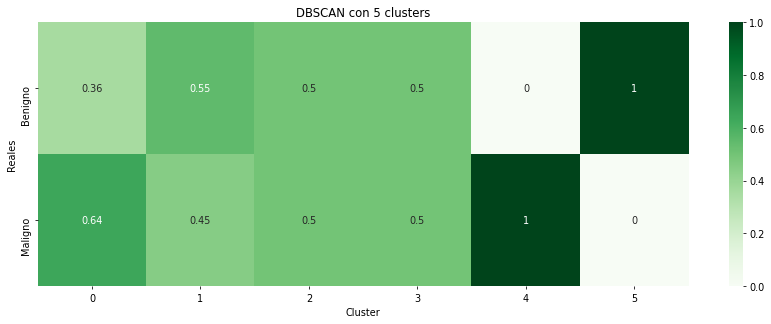

Cantidades  [  56 1725    2    2    4    3]
****************************************************************************************************
Usando euclidean, Se encontraron 3 clusteres + 1 de ruido, para el samples 3.00
[-1  0  1  2]
[[  0   0   0   0]
 [ 22 948   3   0]
 [ 38 777   0   4]
 [  0   0   0   0]]
[[ 22 948   3   0]
 [ 38 777   0   4]]


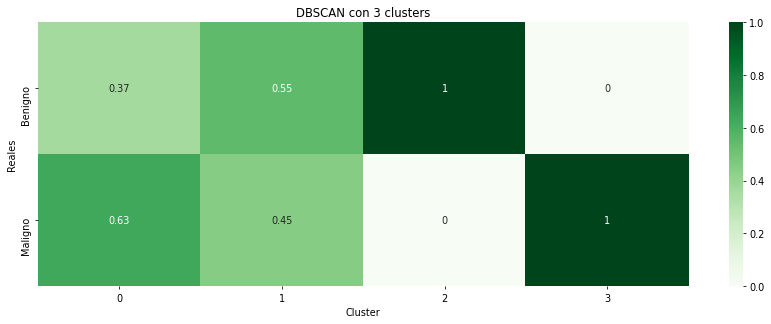

Cantidades  [  60 1725    3    4]
****************************************************************************************************
Usando manhattan, Se encontraron 1 clusteres + 1 de ruido, para el samples 3.00
[-1  0]
[[  0   0   0]
 [972   1   0]
 [817   2   0]]
[[972   1   0]
 [817   2   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


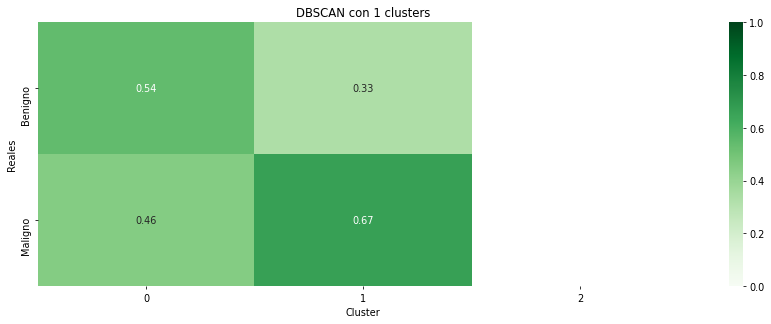

Cantidades  [1789    3]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 4.00
[-1  0]
[[  0   0   0]
 [ 26 947   0]
 [ 42 777   0]]
[[ 26 947   0]
 [ 42 777   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


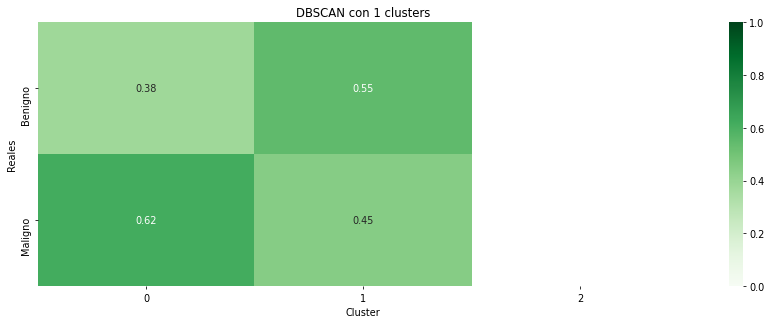

Cantidades  [  68 1724]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 5.00
[-1  0]
[[  0   0   0]
 [ 26 947   0]
 [ 42 777   0]]
[[ 26 947   0]
 [ 42 777   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


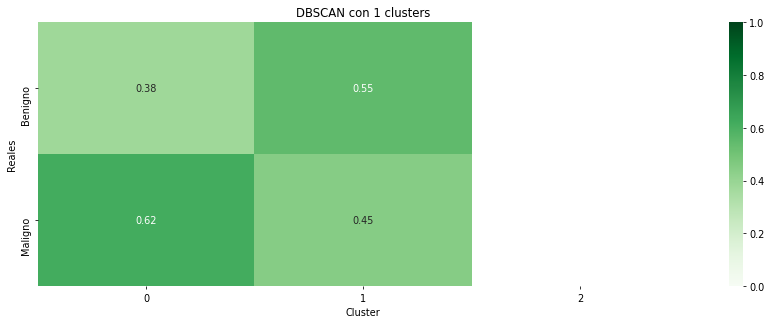

Cantidades  [  68 1724]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 6.00
[-1  0]
[[  0   0   0]
 [ 26 947   0]
 [ 42 777   0]]
[[ 26 947   0]
 [ 42 777   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


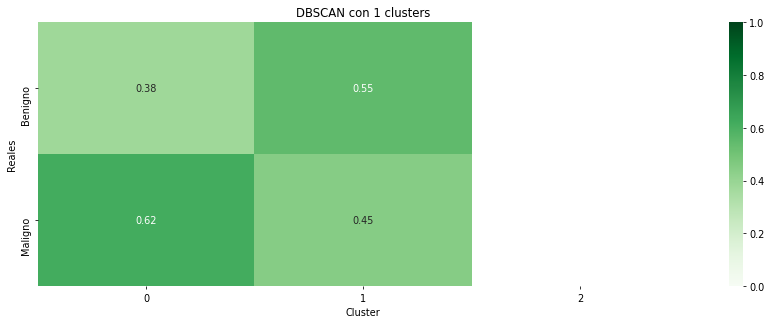

Cantidades  [  68 1724]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 7.00
[-1  0]
[[  0   0   0]
 [ 26 947   0]
 [ 42 777   0]]
[[ 26 947   0]
 [ 42 777   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


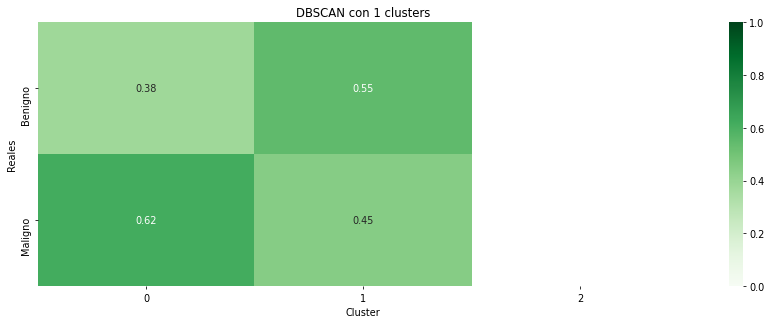

Cantidades  [  68 1724]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 8.00
[-1  0]
[[  0   0   0]
 [ 26 947   0]
 [ 43 776   0]]
[[ 26 947   0]
 [ 43 776   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


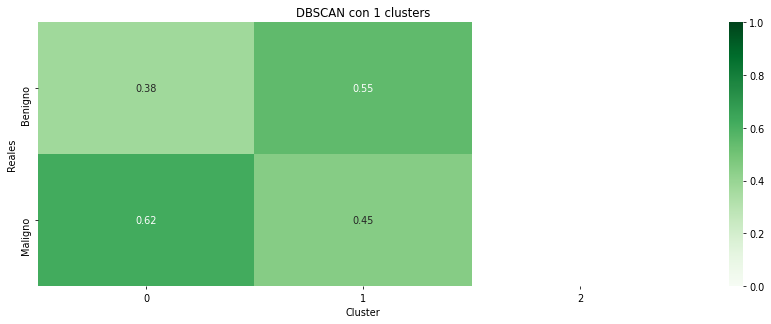

Cantidades  [  69 1723]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 9.00
[-1  0]
[[  0   0   0]
 [ 26 947   0]
 [ 43 776   0]]
[[ 26 947   0]
 [ 43 776   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


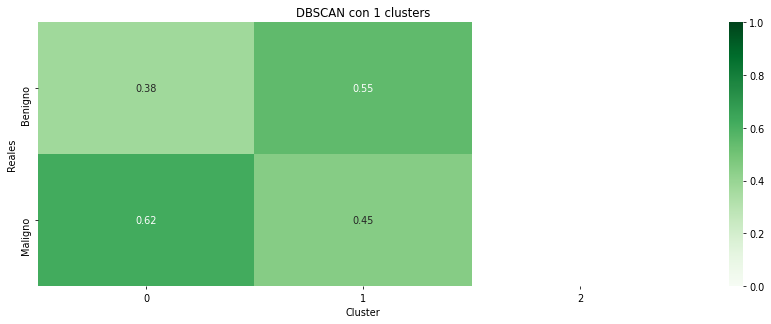

Cantidades  [  69 1723]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 10.00
[-1  0]
[[  0   0   0]
 [ 26 947   0]
 [ 43 776   0]]
[[ 26 947   0]
 [ 43 776   0]]


<ipython-input-19-ced0b4214ec8>:24: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


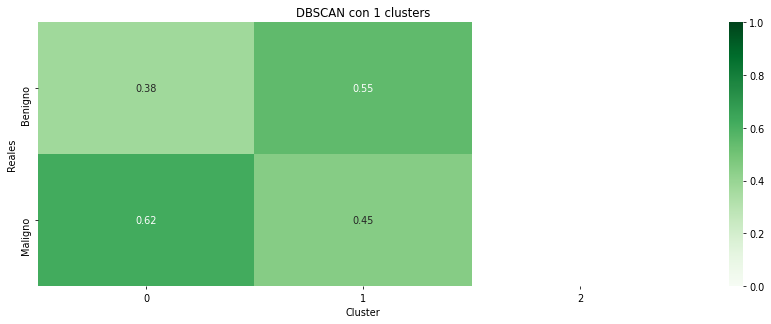

Cantidades  [  69 1723]
****************************************************************************************************


In [19]:
from sklearn.cluster import DBSCAN
affinities = ['euclidean','manhattan']
#[2, 3, 4, 5, 6, 7, 8, 9, 10]
for samp in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for metr in affinities:
        db = DBSCAN(eps = e, min_samples = samp, metric = metr).fit(X[X.columns[:240]])
        clusteres = db.labels_
        n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
        resultado = pd.DataFrame(X[X.columns[:240]]).assign(Cluster = clusteres)
        
        #plt.figure()
        
        if n_clusteres >= 1 and n_clusteres <= 8:
            print('Usando '+ metr+ ', Se encontraron %d clusteres + 1 de ruido, para el samples %0.2f' % (n_clusteres, samp))
            print(np.unique(clusteres))
            #print(resultado)
            
            cf_matrix = confusion_matrix(y_clas, resultado.Cluster)
            print(cf_matrix)
            cf_matrix = cf_matrix[1:3]
            print(cf_matrix)

            fig = plt.figure(figsize = (15, 5), dpi = 70)
            s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
                           cmap="Greens", yticklabels=['Benigno', 'Maligno'])
            s.set(xlabel='Cluster', ylabel='Reales')
            plt.title('DBSCAN con {} clusters'.format(str(n_clusteres)))
            plt.show()
            
            clus, cant = np.unique(resultado.Cluster, return_counts=True)
            print('Cantidades ', cant)
            print('*'*100)

                
        
        #plt.title('Usando '+ metr+ ' k:' + str(k) +', Se encontraron %d clusteres para el samples %0.2f' % (n_clusteres, samp))

### 1000 PCA (99% varianza explicada)

27.449275050780983


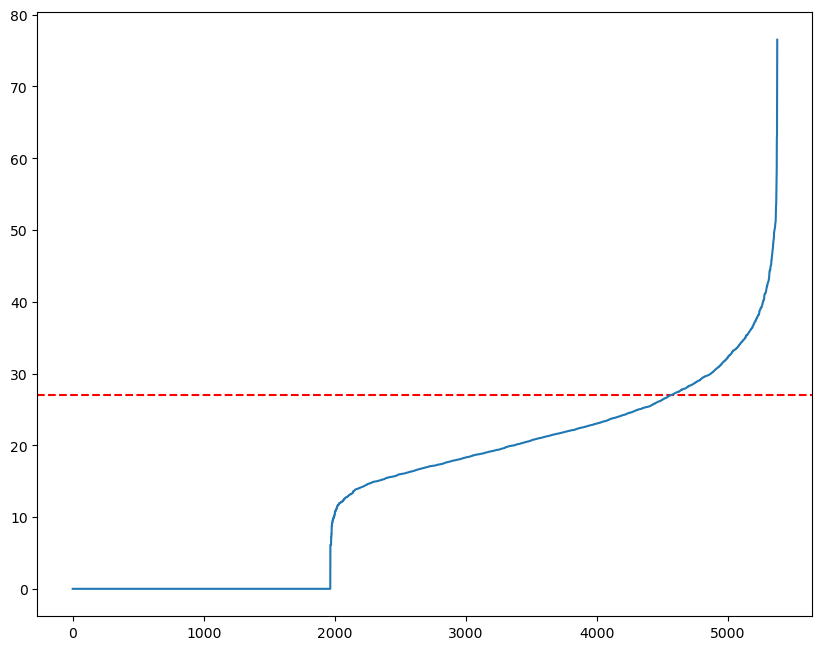

In [20]:
neigh = NearestNeighbors(n_neighbors = 3)
nbrs = neigh.fit(X[X.columns[:1000]])
distancias, indices = nbrs.kneighbors(X[X.columns[:1000]])
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 27, color = 'r', linestyle = '--')
plt.plot(distancias)

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
e = distancias[knee.knee]
print(e)

Usando euclidean, Se encontraron 6 clusteres + 1 de ruido, para el samples 3.00
[-1  0  1  2  3  4  5]
[[  0   0   0   0   0   0   0]
 [188 753  13  12   3   1   3]
 [189 622   5   1   0   2   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
[[188 753  13  12   3   1   3]
 [189 622   5   1   0   2   0]]


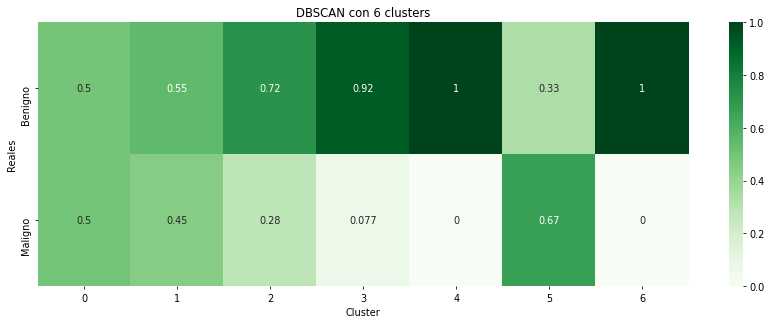

Cantidades  [ 377 1375   18   13    3    3    3]
****************************************************************************************************
Usando euclidean, Se encontraron 4 clusteres + 1 de ruido, para el samples 4.00
[-1  0  1  2  3]
[[  0   0   0   0   0]
 [196 753   5   7  12]
 [192 622   4   0   1]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
[[196 753   5   7  12]
 [192 622   4   0   1]]


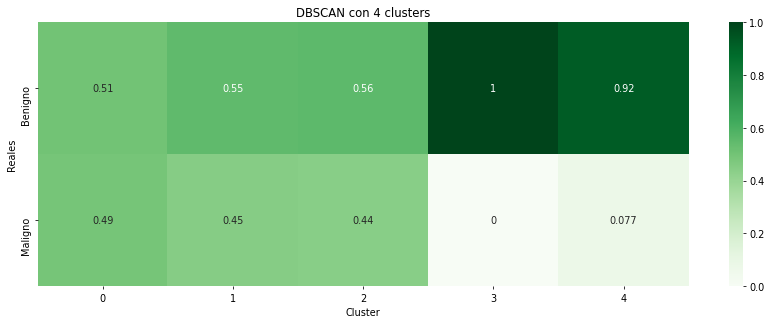

Cantidades  [ 388 1375    9    7   13]
****************************************************************************************************
Usando euclidean, Se encontraron 4 clusteres + 1 de ruido, para el samples 5.00
[-1  0  1  2  3]
[[  0   0   0   0   0]
 [198 752   4   8  11]
 [192 622   4   0   1]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
[[198 752   4   8  11]
 [192 622   4   0   1]]


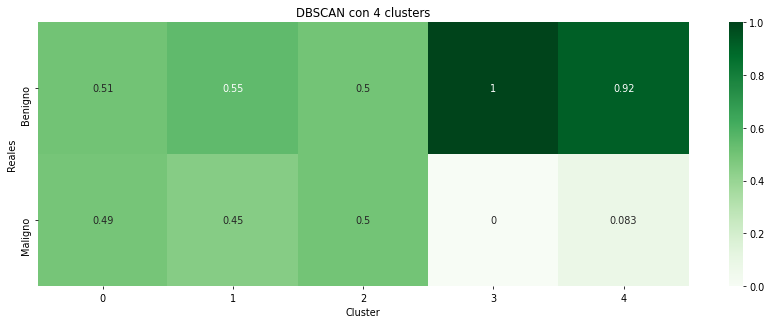

Cantidades  [ 390 1374    8    8   12]
****************************************************************************************************
Usando euclidean, Se encontraron 4 clusteres + 1 de ruido, para el samples 6.00
[-1  0  1  2  3]
[[  0   0   0   0   0]
 [202 750   6   4  11]
 [192 622   0   4   1]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
[[202 750   6   4  11]
 [192 622   0   4   1]]


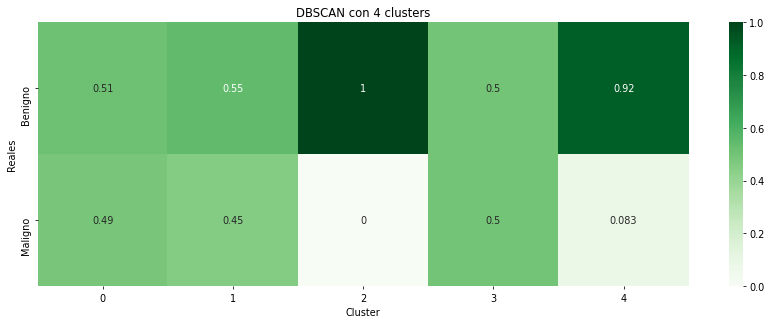

Cantidades  [ 394 1372    6    8   12]
****************************************************************************************************
Usando euclidean, Se encontraron 2 clusteres + 1 de ruido, para el samples 7.00
[-1  0  1]
[[  0   0   0]
 [215 748  10]
 [196 622   1]]
[[215 748  10]
 [196 622   1]]


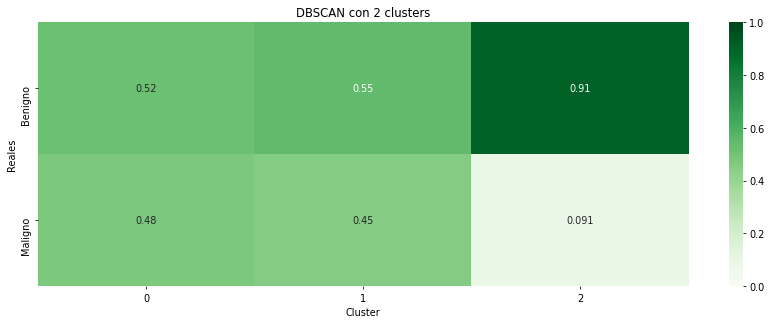

Cantidades  [ 411 1370   11]
****************************************************************************************************
Usando euclidean, Se encontraron 2 clusteres + 1 de ruido, para el samples 8.00
[-1  0  1]
[[  0   0   0]
 [217 747   9]
 [197 621   1]]
[[217 747   9]
 [197 621   1]]


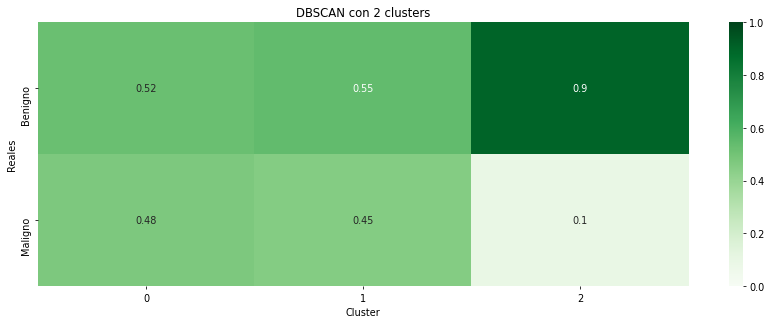

Cantidades  [ 414 1368   10]
****************************************************************************************************
Usando euclidean, Se encontraron 2 clusteres + 1 de ruido, para el samples 9.00
[-1  0  1]
[[  0   0   0]
 [218 747   8]
 [197 621   1]]
[[218 747   8]
 [197 621   1]]


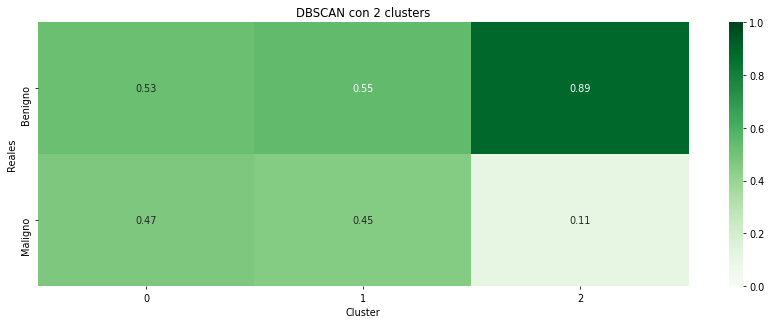

Cantidades  [ 415 1368    9]
****************************************************************************************************
Usando euclidean, Se encontraron 1 clusteres + 1 de ruido, para el samples 10.00
[-1  0]
[[  0   0   0]
 [227 746   0]
 [201 618   0]]
[[227 746   0]
 [201 618   0]]


<ipython-input-21-6e755e66178c>:22: RuntimeWarning: invalid value encountered in true_divide
  s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,


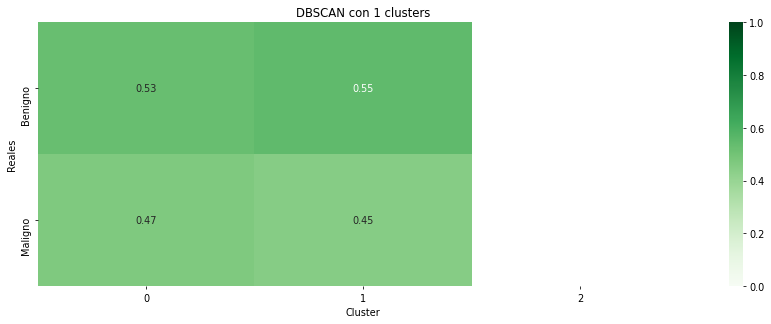

Cantidades  [ 428 1364]
****************************************************************************************************


In [21]:
affinities = ['euclidean','manhattan']
for samp in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for metr in affinities:
        db = DBSCAN(eps = e, min_samples = samp, metric = metr).fit(X[X.columns[:1000]])
        clusteres = db.labels_
        n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
        resultado = pd.DataFrame(X[X.columns[:1000]]).assign(Cluster = clusteres)
        
        #plt.figure()
        
        if n_clusteres >= 1 and n_clusteres <= 8:
            print('Usando '+ metr+ ', Se encontraron %d clusteres + 1 de ruido, para el samples %0.2f' % (n_clusteres, samp))
            print(np.unique(clusteres))
            #print(resultado)
            
            cf_matrix = confusion_matrix(y_clas, resultado.Cluster)
            print(cf_matrix)
            cf_matrix = cf_matrix[1:3]
            print(cf_matrix)

            fig = plt.figure(figsize = (15, 5), dpi = 70)
            s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, vmax=1,
                           cmap="Greens", yticklabels=['Benigno', 'Maligno'])
            s.set(xlabel='Cluster', ylabel='Reales')
            plt.title('DBSCAN con {} clusters'.format(str(n_clusteres)))
            plt.show()
            
            clus, cant = np.unique(resultado.Cluster, return_counts=True)
            print('Cantidades ', cant)
            print('*'*100)